# Exercise2 - Logistic Regerssion

In [3]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
import sys

from mpl_toolkits.mplot3d import Axes3D
 
import seaborn as sns

%matplotlib inline

### Loading data 

Dimensions:  (100, 3)
file: ex2data1.txt
number of features (n): 3
number of examples (m):100

[ 60.18259939  79.03273605  61.10666454  75.02474557  76.0987867
  84.43281996  82.30705337  69.36458876  53.97105215  69.07014406
  70.66150955  76.97878373  89.67677575  77.92409145  62.27101367
  80.19018075  61.37928945  85.40451939  52.04540477  64.17698887
  83.90239366  94.44336777  77.19303493  97.77159928  62.0730638
  91.5649745   79.94481794  99.27252693  90.54671411  97.64563396
  74.24869137  71.79646206  75.39561147  40.45755098  80.27957401
  66.74671857  64.03932042  72.34649423  60.45788574  58.84095622
  99.8278578   47.26426911  50.4581598   88.91389642  94.83450672
  67.31925747  57.23870632  80.366756    68.46852179  75.47770201
  78.63542435  94.09433113  90.44855097  74.49269242  89.84580671
  83.48916274  42.26170081  99.31500881  55.34001756  74.775893  ]


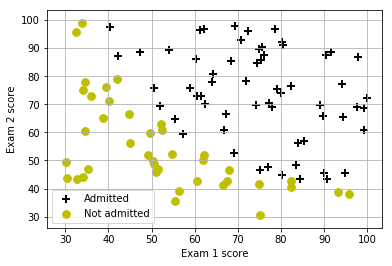

In [4]:
file_name = 'ex2data1.txt'
data = np.loadtxt(file_name, delimiter =',')
print('Dimensions: ',data.shape)

X = np.c_[np.ones((len(data),1)), data[:,0:2]] # create X array colum of 1's and 2 colums of data
y = np.c_[data[:,2]]# create y array colum of output data data

m = X.shape[0] # number of training examples
n = X.shape[1]# number of features... includeing the addition of the 1's

print('file: %s'%(file_name))
print('number of features (n): %.0f'%(n))
print('number of examples (m):%.0f\n'%(m))

def plotData(data, label_x, label_y, label_pos, label_neg, axes = None):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    """

    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0 # ind where all the negative values are
    pos = data[:,2] == 1 # ind where all the postive values are
    
    # If no specific axes object has been passed, get the current axes.
    
    plt.figure()
    if axes == None:
        axes = plt.gca()
    #plot
    axes.scatter(data[pos][:,0], data[pos][:,1], marker = '+', c = 'k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c ='y', s = 60, label = label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon = True, fancybox = True);
    plt.grid(True)
    
    print(data[pos][:,0])

plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

### Logistic regression

Hypothesis:
Sigmoid Function $$h_\theta(x) = g(\theta^{T}x)$$

$$h_\theta(x) = g(\theta x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

Cost Function:
$$J(\theta) = -\frac{1}{m}\sum_{i = 1}^m \Big(y^{(i)}log( h_\theta(x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}))\Big)$$

Vectorised Cost Function:
$$ J(\theta) = -\frac{1}{m}\big(log(h)+(1 - y)^T(log(1 - h)\big)$$
where $$h = g(X\theta)$$

Gradient Descent: Repeat until converge
$$\theta_j : = \theta_j- \frac{\alpha}{m}\frac{\partial J(\theta)}{\partial\theta_{j}}$$


Partial derivative:
j = 0
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$

j = 1,2,3...n
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$

Vectorized Partial Derivative
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y)$$



### Sigmoid Function

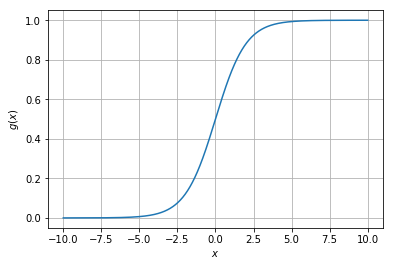

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    """
    g = 1 / (1 + np.exp(-z))
    return(g)

# test on a few values
xx = np.linspace(-10, 10, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.grid(True)

In [7]:
def costFunction(theta, X, y):
    """
    Compute cost logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 

    """
    h = sigmoid(X.dot(theta))
    
    J = -1 * (1/m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradient(theta, X, y):
    """"   
    Compute gradient logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    
    dJ : array_like
    A vector of shape (n+1, ) which is the gradient of the cost
    function with respect to theta, at the current values of theta.
            
    Returns
    -------
    dJ : float 
    """    
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    
    dJ =(1/m) * X.T.dot(h - y)

    return(dJ.flatten())

initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
dJ = gradient(initial_theta, X, y)

print('values at initial thetas:')
print('\ttheta_0: %.2f'%(initial_theta[0]))
print('\ttheta_1: %.2f'%(initial_theta[1]))
print('\ttheta_2: %.2f'%(initial_theta[2]))
print('Grad Cost: \n\tdtheta_0 = %.3f,\n\tdtheta_1 = %.3f \n\tdtheta = %.3f'%(dJ[0], dJ[1], dJ[2]))
print('Cost of initial thetas: %.3f'%(cost))



values at initial thetas:
	theta_0: 0.00
	theta_1: 0.00
	theta_2: 0.00
Grad Cost: 
	dtheta_0 = -0.100,
	dtheta_1 = -12.009 
	dtheta = -11.263
Cost of initial thetas: 0.693


### Optimisation of cost fucntion

In [9]:
res_opt = minimize(costFunction, initial_theta, args = (X,y), method = None, jac = gradient, options = {'maxiter':400})
theta1 = res_opt.x # set the optimised theta values
J1 = costFunction(theta1, X, y)

print('The theta variables for the linear boundary Decision using minimise are:')
print('\ttheta_0 = %.3f \n\ttheta_1 = %.3f \n\ttheta_2 = %.3f'%(theta1[0],theta1[1],theta1[2]))
print('Cost of at best fit = %.3f'%(J1))

The theta variables for the linear boundary Decision using minimise are:
	theta_0 = -25.161 
	theta_1 = 0.206 
	theta_2 = 0.201
Cost of at best fit = 0.203


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


### Predict using sklearn

In [10]:


from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

#predicts the pass or fail of students from exam1 & 2 (provided in X)
def predict(theta, X, threshold = 0.5):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    threshold: float
        sigmoid
    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X.   
    """
        
    p = sigmoid(X.dot(theta.T)) >= threshold # true if sigmoid of exams results using optimised theta > 0.5
    return(p.astype('int'))# 1 if true (i.e. pass) 0 = false (i.e. fail)

# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above
Student_A = np.array([1,45, 85]) 
Student_A_prob = sigmoid(Student_A.dot(theta1.T))
grade_Stu_A = predict(theta1, Student_A)

Class_Admissions = predict(theta1, X)
correct_pred = sum(Class_Admissions == y.ravel())
predict_rate = correct_pred/Class_Admissions.size

print('-----------------------------------------------------------')
print('RESULTS USING THE MINIMISE FUNCTION\n')
print('Optimisation fucntion:minimise()')
print('\nValues of thetea:')
print('\ttheta_0: %.2f'%(theta1[0]))
print('\ttheta_1: %.2f'%(theta1[1]))
print('\ttheta_2:%.2f'%(theta1[2]))
print('Cost: %.3f'%(J1))

print('\nSingle Student  results:')
print('Student Grades:')
print('\tFirts Exam: %.2f'%(Student_A[1]))
print('\tSecond Exam: %.2f'%(Student_A[2]))
print('Predicted Grade: %s'%('PASS' if grade_Stu_A == 1 else 'FAIL')) #prints pass if pass is predited else prints fail
print('Probability of Admission: %.2f%%'%(Student_A_prob * 100))
print('\n')

print('Full Class  results:')
print('number of correct prediction: %.2f'%(correct_pred))
print('Train accuracy %.2f%%'%(100 * predict_rate))
print('-----------------------------------------------------------')


-----------------------------------------------------------
RESULTS USING THE MINIMISE FUNCTION

Optimisation fucntion:minimise()

Values of thetea:
	theta_0: -25.16
	theta_1: 0.21
	theta_2:0.20
Cost: 0.203

Single Student  results:
Student Grades:
	Firts Exam: 45.00
	Second Exam: 85.00
Predicted Grade: PASS
Probability of Admission: 77.63%


Full Class  results:
number of correct prediction: 89.00
Train accuracy 89.00%
-----------------------------------------------------------


### Boundary Decision

[ 60.18259939  79.03273605  61.10666454  75.02474557  76.0987867
  84.43281996  82.30705337  69.36458876  53.97105215  69.07014406
  70.66150955  76.97878373  89.67677575  77.92409145  62.27101367
  80.19018075  61.37928945  85.40451939  52.04540477  64.17698887
  83.90239366  94.44336777  77.19303493  97.77159928  62.0730638
  91.5649745   79.94481794  99.27252693  90.54671411  97.64563396
  74.24869137  71.79646206  75.39561147  40.45755098  80.27957401
  66.74671857  64.03932042  72.34649423  60.45788574  58.84095622
  99.8278578   47.26426911  50.4581598   88.91389642  94.83450672
  67.31925747  57.23870632  80.366756    68.46852179  75.47770201
  78.63542435  94.09433113  90.44855097  74.49269242  89.84580671
  83.48916274  42.26170081  99.31500881  55.34001756  74.775893  ]


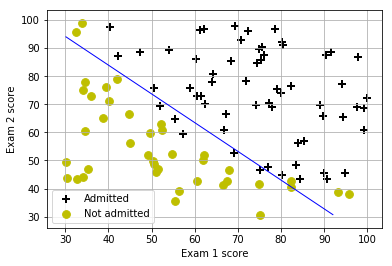

In [11]:
#find the max and min of exam results to create limits for trend line
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) 

#create a of X_data in one line... rshape it later.. this is faster
x0_line = np.ones((xx1.ravel().shape[0],1)) 
x1_line = xx1.ravel()
x2_line = xx2.ravel()

h_prep = np.c_[x0_line, x1_line, x2_line].dot(theta1)
h = sigmoid(h_prep) # pass it thought the sigmoid fucntion
h = h.reshape(xx1.shape) # rehape it to the size of teh grid

plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b'); 




### Regularised Logistic regression

regularisationc can reduce the weight of the parameters in anywa function by increaseing the respective cost.
we edit the hypothesis to inflate the cost and thus reduce the fitting parameters

Note: \theta_0 is not to be regularised adn is calcualted seperately when using the vertorised method

Regularized Cost Function
for $\theta = 1,2,3,...n$
$$ J(\theta) = -\frac{1}{m}\bigg[\sum_{i=1}^{m}\big[y^{(i)} log( h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j = 1}^{n}\theta_{j}^{2}\bigg]$$


Vectorized Cost Function
$$ J(\theta) = -\frac{1}{m}\big((log(h)^Ty+(log(1-h)^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j = 1}^{n}\theta_{j}^{2}$$

Gradient Descent: Repeat until converge<br>
for j = 0 (The intercept is not regularised)
$$\theta_0 : = \theta_0- \alpha\frac{\partial J(\theta)}{\partial\theta_{0}}$$
for j = 1,2,3...n
$$\theta_j : = \theta_j- \alpha\Big[\Big(\frac{\partial J(\theta)}{\partial\theta_{j}}\Big) + \frac{\lambda}{m}\theta_{j}\Big] $$


Partial derivatives:<br>
for j = 0 
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$

for j = 1,2,3...m 
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} +\frac{\lambda}{m}\theta_{j}^{2}$$

Vectorized Partial Derivative <br>
for j = 0 
$$\frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} X^T(h-y)$$
for j = 1,2,3... n
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y) + \frac{\lambda}{m}\theta_{j}^{2}$$
where $h = g(X\theta)$

                                

#### Import data

number of features: 2.00
number of training examples: 118.00
[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283   -0.36348
 -0.30012   -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408    0.44297
  0.322      0.13767   -0.0063364 -0.092742  -0.20795   -0.20795   -0.43836
 -0.21947   -0.13882  ]


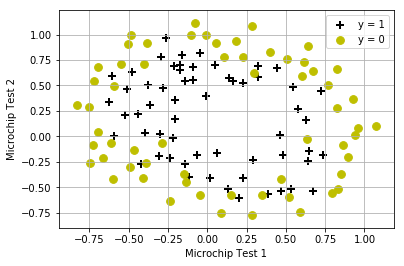

In [12]:
data2 = np.loadtxt('ex2data2.txt', delimiter =',')

y = np.c_[data2[:,2]]
X = data2[:,0:2]

m = X.shape[0] # number of training examples
n = X.shape[1]# number of features... 

print('number of features: %.2f'%(n))
print('number of training examples: %.2f'%(m))
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')


### Polynomials

Polynomial number of features: 28.00
Polynomial number of training examples: 118.00
[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283   -0.36348
 -0.30012   -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408    0.44297
  0.322      0.13767   -0.0063364 -0.092742  -0.20795   -0.20795   -0.43836
 -0.21947   -0.13882  ]


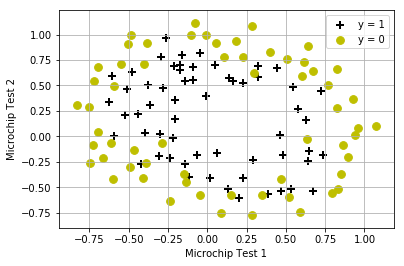

In [13]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])

m_poly = XX.shape[0] # number of training examples
n_poly = XX.shape[1]# number of features... 

print('Polynomial number of features: %.2f'%(n_poly))
print('Polynomial number of training examples: %.2f'%(m_poly))
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [19]:

# Determine Cost Function


def costFunctionReg(theta, reg, XX, y):
    """
    Compute cost for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 

    Reg: float
        The regularization parameter. 
        
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    

    """
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1 * (1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (reg / (2 * m)) * np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradientReg(theta, reg, *args):
    """"
    Compute gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 

    Reg: float
        The regularization parameter. 
        
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    Returns
        grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    """
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1 / m) * XX.T.dot(h - y) + (reg / m) * np.r_[[[0]],theta[1:].reshape(-1, 1)]
    grad = grad.flatten()
    return(grad)



In [20]:
initial_theta = np.zeros(XX.shape[1])
J2 = costFunctionReg(initial_theta, 1, XX, y)

print('Cost Function: %.3f'%(J2))

Cost Function: 0.693


### Vary Regularisation parameter

[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283   -0.36348
 -0.30012   -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408    0.44297
  0.322      0.13767   -0.0063364 -0.092742  -0.20795   -0.20795   -0.43836
 -0.21947   -0.13882  ]
[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


[ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477   -0.39804
 -0.30588    0.016705   0.13191    0.38537    0.52938    0.63882    0.73675
  0.54666    0.322      0.16647   -0.046659  -0.17339   -0.47869   -0.60541
 -0.62846   -0.59389   -0.42108   -0.11578    0.20104    0.46601    0.67339
 -0.13882   -0.29435   -0.26555   -0.16187   -0.17339   -0.28283   -0.36348
 -0.30012   -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408    0.44297
  0.322      0.13767   -0.0063364 -0.092742  -0.20795   -0.20795   -0.43836
 -0.21947   -0.13882  ]


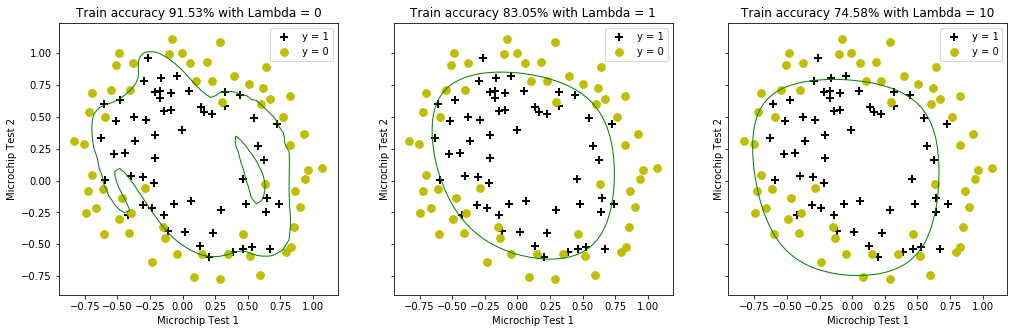

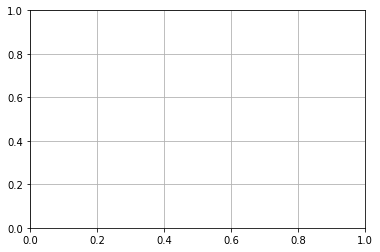

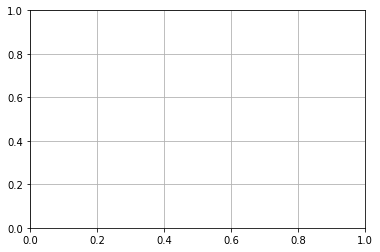

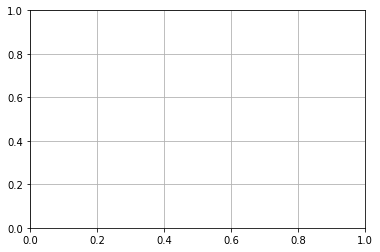

In [21]:

fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0,1,10]):
    # Optimize costFunctionReg

    res_opt2 = minimize(costFunctionReg, initial_theta, args = (C, XX, y), method = None, jac = gradientReg, options = {'maxiter':3000})
    
    # Accuracy
    accuracy = 100 * sum(predict(res_opt2.x, XX) == y.ravel())/y.size    
    
    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    #Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res_opt2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))